In [9]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.column', 5000)
pd.set_option('display.max_columns', None)

# Some Informations about project details

'Name', 'Artist', 'Duration(s)', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Tempo', 'Valence'

In [16]:
df_18 = pd.read_csv('../CMPE 251 Project/CSV/afterEkim18_aykolm.csv')
df_19 = pd.read_csv('../CMPE 251 Project/CSV/newSeason19_aykolm.csv')
df_20 = pd.read_csv('../CMPE 251 Project/CSV/seas20_aykolm.csv')

In [17]:
class total_of_spec:
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def get_total_popularity(self, playlist_csv):
        total_popularity = 0
        for popularity in playlist_csv['Popularity']:
            total_popularity += (float(popularity))   
        return total_popularity
    
    def get_total_danceability(self, playlist_csv):
        total_danceability = 0.0
        for danceability in playlist_csv['Danceability']:
            total_danceability += (float(danceability))
        return total_danceability
    
    def get_total_energy(self, playlist_csv):
        total_energy = 0.0
        for energy in playlist_csv['Energy']:
            total_energy += (float(energy))
        return total_energy
    
    def get_total_loudness(self, playlist_csv):
        total_loudness = 0.0
        for loudness in playlist_csv['Loudness']:
            total_loudness += (float(loudness))
        return total_loudness
    
    def get_total_speechiness(self, playlist_csv):
        total_speechiness = 0.0
        for speechiness in playlist_csv['Speechiness']:
            total_speechiness += (float(speechiness))
        return total_speechiness
    
    def get_total_tempo(self, playlist_csv):
        total_tempo = 0.0
        for tempo in playlist_csv['Tempo']:
            total_tempo += (float(tempo))    
        return total_tempo
    
    def get_total_valence(self, playlist_csv):
        total_valence = 0.0
        for valence in playlist_csv['Valence']:
            total_valence += (float(valence))
        return total_valence
    
    def get_total_features(self, playlist_csv):
        total_pop = self.get_total_popularity(playlist_csv)
        total_dance = self.get_total_danceability(playlist_csv)
        total_energy = self.get_total_energy(playlist_csv)
        total_loud = self.get_total_loudness(playlist_csv)
        total_speech = self.get_total_speechiness(playlist_csv)
        total_tempo = self.get_total_tempo(playlist_csv)
        total_valence = self.get_total_valence(playlist_csv)
        
        total_year = []
        total_features = [total_pop, total_dance, total_energy, total_loud, total_speech, total_tempo, total_valence] 
        
        if '18' in playlist_csv:
            total_year = pd.DataFrame(total_features,columns = ['Total for 2018 - 100Tracks'])
        elif '19'in playlist_csv:
            total_year = pd.DataFrame(total_features,columns = ['Total for 2019 - 96Tracks'])
        else:
            total_year = pd.DataFrame(total_features,columns = ['Total for 2020 - 100Tracks'])
            
        total_year.index = ['Total Popularity', 'Total Danceability', 'Total Energy', 
                            'Total Loudness', 'Total Speechiness', 'Total Tempo', 'Total Valence']
        return total_year

    def get_average_features(self,playlist_csv):
        divider = len(playlist_csv)
        
        avg_pop = self.get_total_popularity(playlist_csv) / divider
        avg_dance = self.get_total_danceability(playlist_csv) / divider
        avg_energy = self.get_total_energy(playlist_csv) / divider
        avg_loud = self.get_total_loudness(playlist_csv) / divider
        avg_speech = self.get_total_speechiness(playlist_csv) / divider
        avg_tempo = self.get_total_tempo(playlist_csv) / divider
        avg_valence = self.get_total_valence(playlist_csv) / divider
        
        avg_year = []
        avg_features = [avg_pop, avg_dance, avg_energy, avg_loud, avg_speech, avg_tempo, avg_valence]
        
        if '18' in playlist_csv:
            avg_year = pd.DataFrame(avg_features,columns = ['Average for 2018'])
        elif '19'in playlist_csv:
            avg_year = pd.DataFrame(avg_features,columns = ['Average for 2019'])
        else:
            avg_year = pd.DataFrame(avg_features,columns = ['Average for 2020'])
            
        avg_year.index = ['Avg Popularity', 'Avg Danceability', 'Avg Energy', 
                            'Avg Loudness', 'Avg Speechiness', 'Avg Tempo', 'Avg Valence']
        return avg_year    

In [18]:
tos = total_of_spec()

In [19]:
total_18 = tos.get_total_features(df_18)
total_19 = tos.get_total_features(df_19)
total_20 = tos.get_total_features(df_20)

Popularity = "(0-100.0)"
Danceability = "(0-1.0)"
Energy = "(0-1.0)"
Loudness = "in dB (-60.0-0)"
Speechiness = "(0-1.0)"
Tempo = "in RPM (0-250?)"
Valence = "Higher -> positive (0-1.0)"

total_info = [Popularity,Danceability,Energy,Loudness,Speechiness,Tempo,Valence]

total_pd = pd.DataFrame(total_info, columns = ['Min-Max Values - 1 track'])
total_pd.index = ['Total Popularity', 'Total Danceability', 'Total Energy', 
                  'Total Loudness', 'Total Speechiness', 'Total Tempo', 'Total Valence']

# General Comparison by year

In [20]:
general = total_18 + total_19 + total_20 + total_pd

general.loc[:,'Total for 2018 - 100Tracks'] = total_18
general.loc[:,'Total for 2019 - 96Tracks'] = total_19
general.loc[:,'Total for 2020 - 100Tracks'] = total_20
general.loc[:,'Min-Max Values - 1 track'] = total_pd
general = general[['Total for 2018 - 100Tracks', 'Total for 2019 - 96Tracks',
                   'Total for 2020 - 100Tracks', 'Min-Max Values - 1 track']]
general.to_csv('General.csv', sep= ',')
general

,Total for 2018 - 100Tracks,Total for 2019 - 96Tracks,Total for 2020 - 100Tracks,Min-Max Values - 1 track
Total Popularity,3224.0000,3459.0000,5413.0000,(0-100.0)
Total Danceability,72.8670,68.8700,68.4610,(0-1.0)
Total Energy,67.4570,60.8860,65.2400,(0-1.0)
Total Loudness,-666.6450,-674.6330,-698.3520,in dB (-60.0-0)
Total Speechiness,16.8535,15.8573,15.5379,(0-1.0)
Total Tempo,12227.2960,11431.8620,12703.1550,in RPM (0-250?)
Total Valence,41.2156,44.0311,42.1939,Higher -> positive (0-1.0)


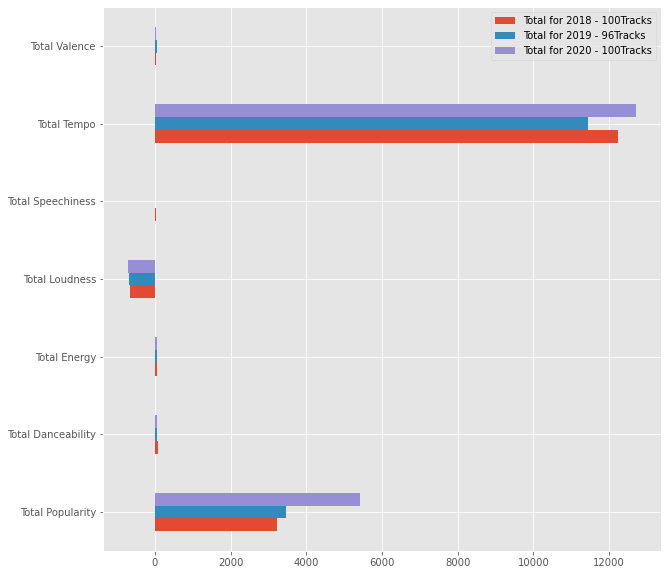

In [21]:
general.plot(kind = 'barh')

# Average Comparison by year

In [22]:
avg_18 = tos.get_average_features(df_18)
avg_19 = tos.get_average_features(df_19)
avg_20 = tos.get_average_features(df_20)

avg_info = [Popularity,Danceability,Energy,Loudness,Speechiness,Tempo,Valence]

avg_pd = pd.DataFrame(avg_info, columns = ['Min-Max Values'])
avg_pd.index = ['Avg Popularity', 'Avg Danceability', 'Avg Energy', 
                  'Avg Loudness', 'Avg Speechiness', 'Avg Tempo', 'Avg Valence']

In [23]:
general_avg = pd.DataFrame()
general_avg = avg_18 + avg_19 + avg_20 + avg_pd

general_avg.loc[:,'Average for 2018'] = avg_18
general_avg.loc[:,'Average for 2019'] = avg_19
general_avg.loc[:,'Average for 2020'] = avg_20
general_avg.loc[:,'Min-Max Values'] = avg_pd

general_avg = general_avg[['Average for 2018', 'Average for 2019', 'Average for 2020', 'Min-Max Values']]
general_avg.to_csv('General Avg.csv', sep= ',')
general_avg

,Average for 2018,Average for 2019,Average for 2020,Min-Max Values
Avg Popularity,32.240000,36.031250,54.130000,(0-100.0)
Avg Danceability,0.728670,0.717396,0.684610,(0-1.0)
Avg Energy,0.674570,0.634229,0.652400,(0-1.0)
Avg Loudness,-6.666450,-7.027427,-6.983520,in dB (-60.0-0)
Avg Speechiness,0.168535,0.165180,0.155379,(0-1.0)
Avg Tempo,122.272960,119.081896,127.031550,in RPM (0-250?)
Avg Valence,0.412156,0.458657,0.421939,Higher -> positive (0-1.0)


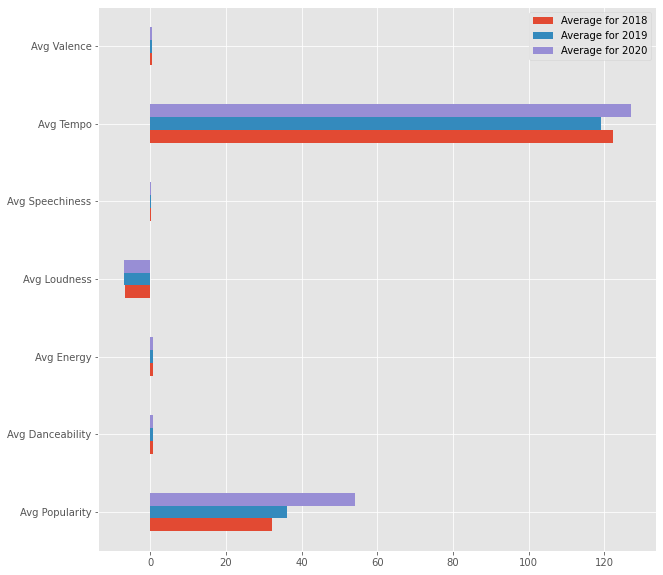

In [24]:
general_avg.plot(kind = 'barh')